### Graphics for visualization of results

#### 1. Nearest-Neighbor x Optimization with SLSQP - Average Positioning Error by $(\rho_0, \alpha)$ combination

Using Bookman Old Style font


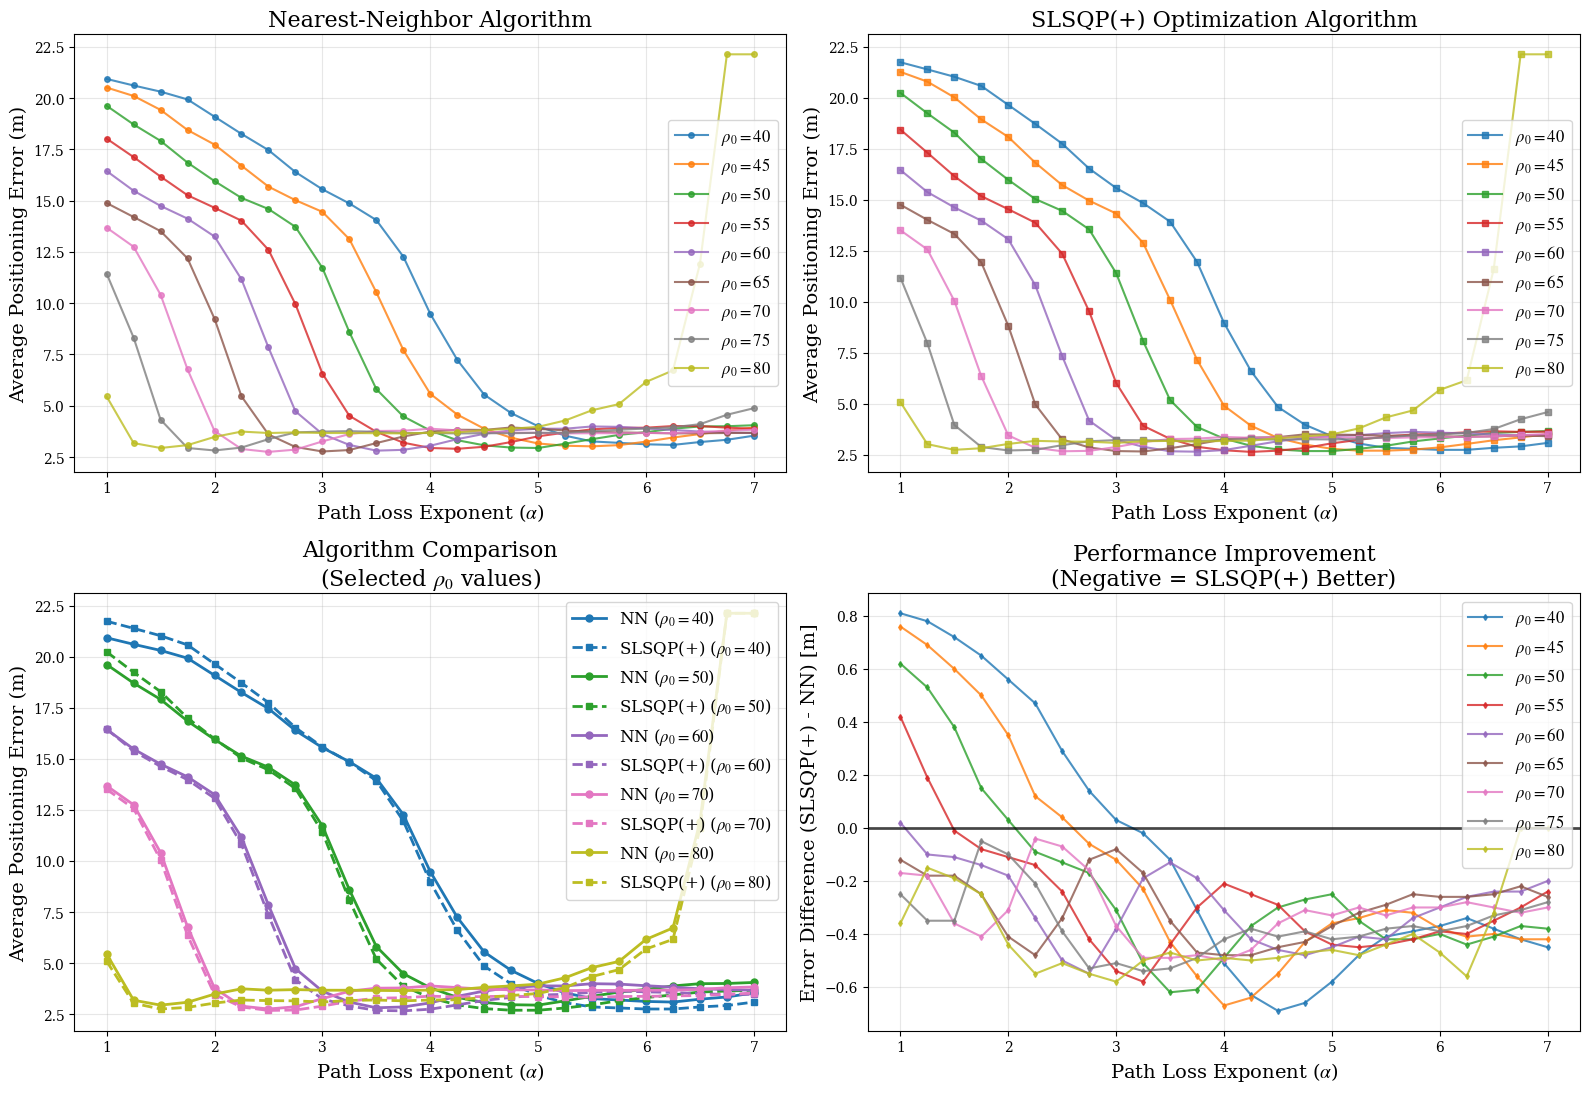

=== SUMMARY STATISTICS ===
Total ρ₀ values analyzed: 9 (range: 40 - 80)
NN Algorithm - Best performance: 2.750m at (ρ₀=70.0, α=2.5)
SLSQP Algorithm - Best performance: 2.650m at (ρ₀=55.0, α=4.25)
Overall average improvement: 0.270m (3.9%)

NN Algorithm - Worst performance: 22.130m
SLSQP Algorithm - Worst performance: 22.130m
Performance improvement range: -0.690m to 0.810m


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set font to Bookman Old Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Bookman Old Style', 'Book Antiqua', 'Times New Roman', 'DejaVu Serif']
plt.rcParams['text.usetex'] = False  # Disable LaTeX rendering
plt.rcParams['mathtext.fontset'] = 'stix'  # Use STIX fonts for math text
print("Using Bookman Old Style font")

# Set up paths
project_root = Path().resolve().parent
nn_file = project_root / 'output' / 'nn_results_by_params.csv'
slsqp_file = project_root / 'output' / 'optimized_results_by_params.csv'

# Load the data
nn_results = pd.read_csv(nn_file)
slsqp_results = pd.read_csv(slsqp_file)

# Use selected rho_0 values from 40 to 80 with steps of 5
selected_rho_values = list(range(40, 85, 5))  # [40, 45, 50, 55, 60, 65, 70, 75, 80]
all_rho_values = selected_rho_values
nn_filtered = nn_results[nn_results['rho_0'].isin(selected_rho_values)]
slsqp_filtered = slsqp_results[slsqp_results['rho_0'].isin(selected_rho_values)]

# Create the 2x2 subplot with appropriate figure size
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# fig.suptitle('Positioning Error Comparison: Nearest-Neighbor vs SLSQP Optimization\n' +
#              r'by Log-Distance Path Loss Parameters ($\rho_0$: 40-80 dB, steps of 5 dB)',
#              fontsize=16, fontweight='bold')

# Define distinct colors for the 9 rho_0 values using a colormap
cmap = plt.get_cmap('tab10')  # Use tab10 colormap for distinct colors
colors = [cmap(i / len(all_rho_values)) for i in range(len(all_rho_values))]
rho_color_map = dict(zip(all_rho_values, colors))

# Plot 1: NN Algorithm - All devices
ax1 = axes[0, 0]
for rho_0 in all_rho_values:
    data = nn_filtered[nn_filtered['rho_0'] == rho_0]
    ax1.plot(data['alpha'], data['mean_error'],
             marker='o', linewidth=1.5, markersize=4,
             color=rho_color_map[rho_0],
             label=r'$\rho_0 = {}$'.format(rho_0),  # Math text formatting
             alpha=0.8)

ax1.set_xlabel(r'Path Loss Exponent ($\alpha$)', fontsize=14)
ax1.set_ylabel(r'Average Positioning Error (m)', fontsize=14)
ax1.set_title('Nearest-Neighbor Algorithm', fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12, loc='best')

# Plot 2: SLSQP Algorithm - All devices
ax2 = axes[0, 1]
for rho_0 in all_rho_values:
    data = slsqp_filtered[slsqp_filtered['rho_0'] == rho_0]
    ax2.plot(data['alpha'], data['mean_error'],
             marker='s', linewidth=1.5, markersize=4,
             color=rho_color_map[rho_0],
             label=r'$\rho_0 = {}$'.format(rho_0),  # Math text formatting
             alpha=0.8)

ax2.set_xlabel(r'Path Loss Exponent ($\alpha$)', fontsize=14)
ax2.set_ylabel(r'Average Positioning Error (m)', fontsize=14)
ax2.set_title('SLSQP(+) Optimization Algorithm', fontsize=16)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12, loc='best')

# Plot 3: Comparison for selected rho_0 values (overlay)
ax3 = axes[1, 0]
# Select every other rho_0 value for comparison to avoid overcrowding
selected_rho_comparison = all_rho_values[::2]  # [40, 50, 60, 70, 80]

for rho_0 in selected_rho_comparison:
    nn_data = nn_filtered[nn_filtered['rho_0'] == rho_0]
    slsqp_data = slsqp_filtered[slsqp_filtered['rho_0'] == rho_0]

    ax3.plot(nn_data['alpha'], nn_data['mean_error'],
             marker='o', linewidth=2, markersize=5,
             color=rho_color_map[rho_0], linestyle='-',
             label='NN ($\\rho_0={}$)'.format(rho_0))
    ax3.plot(slsqp_data['alpha'], slsqp_data['mean_error'],
             marker='s', linewidth=2, markersize=5,
             color=rho_color_map[rho_0], linestyle='--',
             label='SLSQP(+) ($\\rho_0={}$)'.format(rho_0))

ax3.set_xlabel(r'Path Loss Exponent ($\alpha$)', fontsize=14)
ax3.set_ylabel(r'Average Positioning Error (m)', fontsize=14)
ax3.set_title('Algorithm Comparison\n(Selected $\\rho_0$ values)', fontsize=16)
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=12, loc='best')

# Plot 4: Error difference (SLSQP - NN) for all rho_0 values
ax4 = axes[1, 1]
for rho_0 in all_rho_values:
    nn_data = nn_filtered[nn_filtered['rho_0'] == rho_0].set_index('alpha')['mean_error']
    slsqp_data = slsqp_filtered[slsqp_filtered['rho_0'] == rho_0].set_index('alpha')['mean_error']

    # Calculate difference (negative means SLSQP is better)
    error_diff = slsqp_data - nn_data

    ax4.plot(error_diff.index, error_diff.values,
             marker='d', linewidth=1.5, markersize=3,
             color=rho_color_map[rho_0],
             label=r'$\rho_0 = {}$'.format(rho_0),  # Math text formatting
             alpha=0.8)

ax4.axhline(y=0, color='black', linestyle='-', alpha=0.7, linewidth=2)
ax4.set_xlabel(r'Path Loss Exponent ($\alpha$)', fontsize=14)
ax4.set_ylabel(r'Error Difference (SLSQP(+) - NN) [m]', fontsize=14)
ax4.set_title('Performance Improvement\n(Negative = SLSQP(+) Better)', fontsize=16)
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=12, loc='best')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print summary statistics
print("=== SUMMARY STATISTICS ===")
print(f"Total ρ₀ values analyzed: {len(all_rho_values)} (range: {min(all_rho_values)} - {max(all_rho_values)})")
print(f"NN Algorithm - Best performance: {nn_filtered['mean_error'].min():.3f}m at (ρ₀={nn_filtered.loc[nn_filtered['mean_error'].idxmin(), 'rho_0']}, α={nn_filtered.loc[nn_filtered['mean_error'].idxmin(), 'alpha']})")
print(f"SLSQP Algorithm - Best performance: {slsqp_filtered['mean_error'].min():.3f}m at (ρ₀={slsqp_filtered.loc[slsqp_filtered['mean_error'].idxmin(), 'rho_0']}, α={slsqp_filtered.loc[slsqp_filtered['mean_error'].idxmin(), 'alpha']})")

# Calculate overall improvement
overall_improvement = nn_filtered['mean_error'].mean() - slsqp_filtered['mean_error'].mean()
improvement_percentage = (overall_improvement/nn_filtered['mean_error'].mean()*100)
print(f"Overall average improvement: {overall_improvement:.3f}m ({improvement_percentage:.1f}%)")

# Additional statistics
print(f"\nNN Algorithm - Worst performance: {nn_filtered['mean_error'].max():.3f}m")
print(f"SLSQP Algorithm - Worst performance: {slsqp_filtered['mean_error'].max():.3f}m")
print(f"Performance improvement range: {(slsqp_filtered['mean_error'] - nn_filtered['mean_error']).min():.3f}m to {(slsqp_filtered['mean_error'] - nn_filtered['mean_error']).max():.3f}m")

# Reset matplotlib settings to default after plotting (optional)
# plt.rcParams.update(plt.rcParamsDefault)

In [11]:
# Save the figure as a pdf file
fig.savefig(project_root / 'figures' / 'positioning_error_comparison.pdf', bbox_inches='tight')
print("Figure saved as 'positioning_error_comparison.pdf' in the output directory.")

Figure saved as 'positioning_error_comparison.pdf' in the output directory.


#### 2. Pairwise distances (plot of mean of pairwise distances by combinations of $\rho_0$ and $\alpha$)

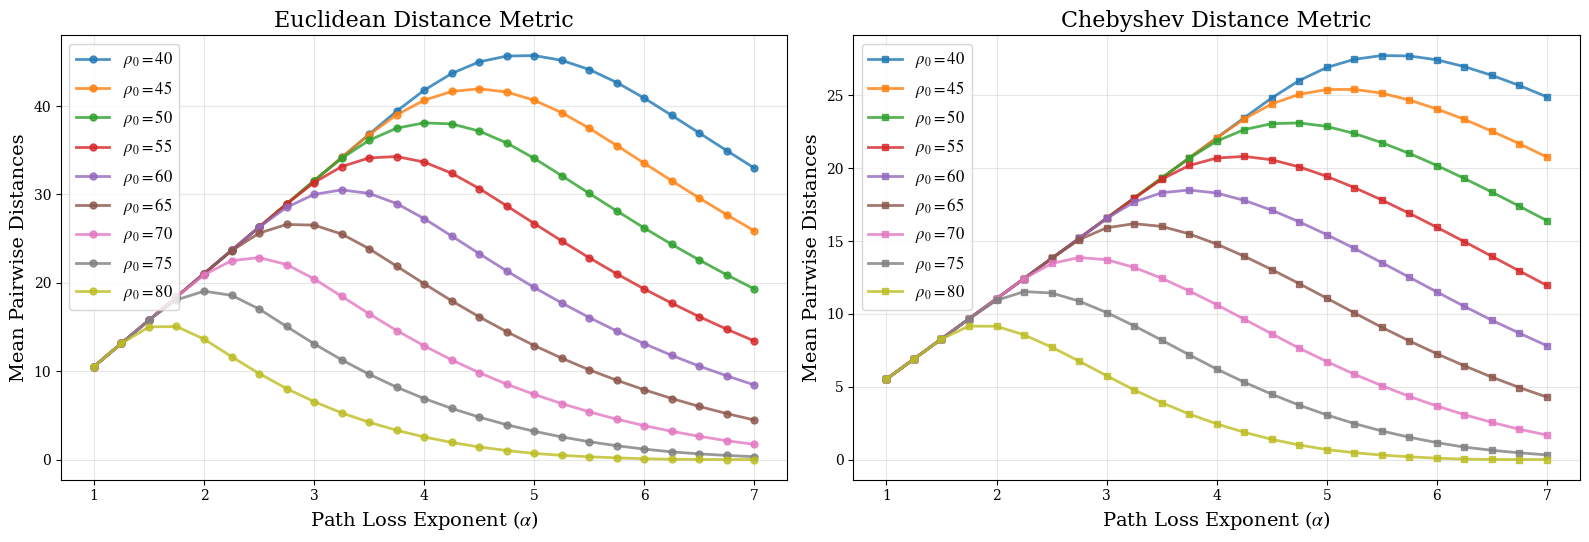


=== PAIRWISE DISTANCES SUMMARY ===
Euclidean Distances - Range: 0.000 to 45.721
Chebyshev Distances - Range: 0.000 to 27.733
Euclidean - Best (highest): 45.721 at (ρ₀=40.0, α=5.0)
Chebyshev - Best (highest): 27.733 at (ρ₀=40.0, α=5.5)
Pairwise distances figure saved as 'pairwise_distances_comparison.pdf' in the figures directory.


In [13]:
# Load pairwise distances data
euclidean_file = project_root / 'output' / 'mean_pairwise_distances_euclidean.csv'
chebyshev_file = project_root / 'output' / 'mean_pairwise_distances_chebyshev.csv'

# Load the data
euclidean_data = pd.read_csv(euclidean_file)
chebyshev_data = pd.read_csv(chebyshev_file)

# Filter data for selected rho_0 values (40 to 80 with steps of 5)
euclidean_filtered = euclidean_data[euclidean_data['rho_0'].isin(selected_rho_values)]
chebyshev_filtered = chebyshev_data[chebyshev_data['rho_0'].isin(selected_rho_values)]

# Create the 1x2 subplot for pairwise distances
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))
# fig2.suptitle('Mean Pairwise Distances by Log-Distance Path Loss Parameters\n' +
#               r'($\rho_0$: 40-80 dB, steps of 5 dB)',
#               fontsize=16, fontweight='bold')

# Plot 1: Euclidean Pairwise Distances
ax1 = axes2[0]
for rho_0 in all_rho_values:
    data = euclidean_filtered[euclidean_filtered['rho_0'] == rho_0].sort_values('alpha')
    ax1.plot(data['alpha'], data['mean_pw_distance'],
             marker='o', linewidth=2, markersize=5,
             color=rho_color_map[rho_0],
             label=r'$\rho_0 = {}$'.format(rho_0),
             alpha=0.8)

ax1.set_xlabel(r'Path Loss Exponent ($\alpha$)', fontsize=14)
ax1.set_ylabel('Mean Pairwise Distances', fontsize=14)
ax1.set_title('Euclidean Distance Metric', fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12, loc='best')

# Plot 2: Chebyshev Pairwise Distances
ax2 = axes2[1]
for rho_0 in all_rho_values:
    data = chebyshev_filtered[chebyshev_filtered['rho_0'] == rho_0].sort_values('alpha')
    ax2.plot(data['alpha'], data['mean_pw_distance'],
             marker='s', linewidth=2, markersize=5,
             color=rho_color_map[rho_0],
             label=r'$\rho_0 = {}$'.format(rho_0),
             alpha=0.8)

ax2.set_xlabel(r'Path Loss Exponent ($\alpha$)', fontsize=14)
ax2.set_ylabel('Mean Pairwise Distances', fontsize=14)
ax2.set_title('Chebyshev Distance Metric', fontsize=16)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12, loc='best')

# Adjust layout and show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print summary statistics for pairwise distances
print("\n=== PAIRWISE DISTANCES SUMMARY ===")
print(f"Euclidean Distances - Range: {euclidean_filtered['mean_pw_distance'].min():.3f} to {euclidean_filtered['mean_pw_distance'].max():.3f}")
print(f"Chebyshev Distances - Range: {chebyshev_filtered['mean_pw_distance'].min():.3f} to {chebyshev_filtered['mean_pw_distance'].max():.3f}")
print(f"Euclidean - Best (highest): {euclidean_filtered['mean_pw_distance'].max():.3f} at (ρ₀={euclidean_filtered.loc[euclidean_filtered['mean_pw_distance'].idxmax(), 'rho_0']}, α={euclidean_filtered.loc[euclidean_filtered['mean_pw_distance'].idxmax(), 'alpha']})")
print(f"Chebyshev - Best (highest): {chebyshev_filtered['mean_pw_distance'].max():.3f} at (ρ₀={chebyshev_filtered.loc[chebyshev_filtered['mean_pw_distance'].idxmax(), 'rho_0']}, α={chebyshev_filtered.loc[chebyshev_filtered['mean_pw_distance'].idxmax(), 'alpha']})")

# Save the pairwise distances figure
fig2.savefig(project_root / 'figures' / 'pairwise_distances_comparison.pdf', bbox_inches='tight')
print("Pairwise distances figure saved as 'pairwise_distances_comparison.pdf' in the figures directory.")

### 3. Barplots with optimal combinations by algorithm

Optimal parameters data loaded:
Shape: (68, 4)
Algorithms: ['Mean-Chebyshev', 'Mean-Euclidean', 'NN', 'SLSQP(+)']
rho_0 range: 40.0 - 80.0


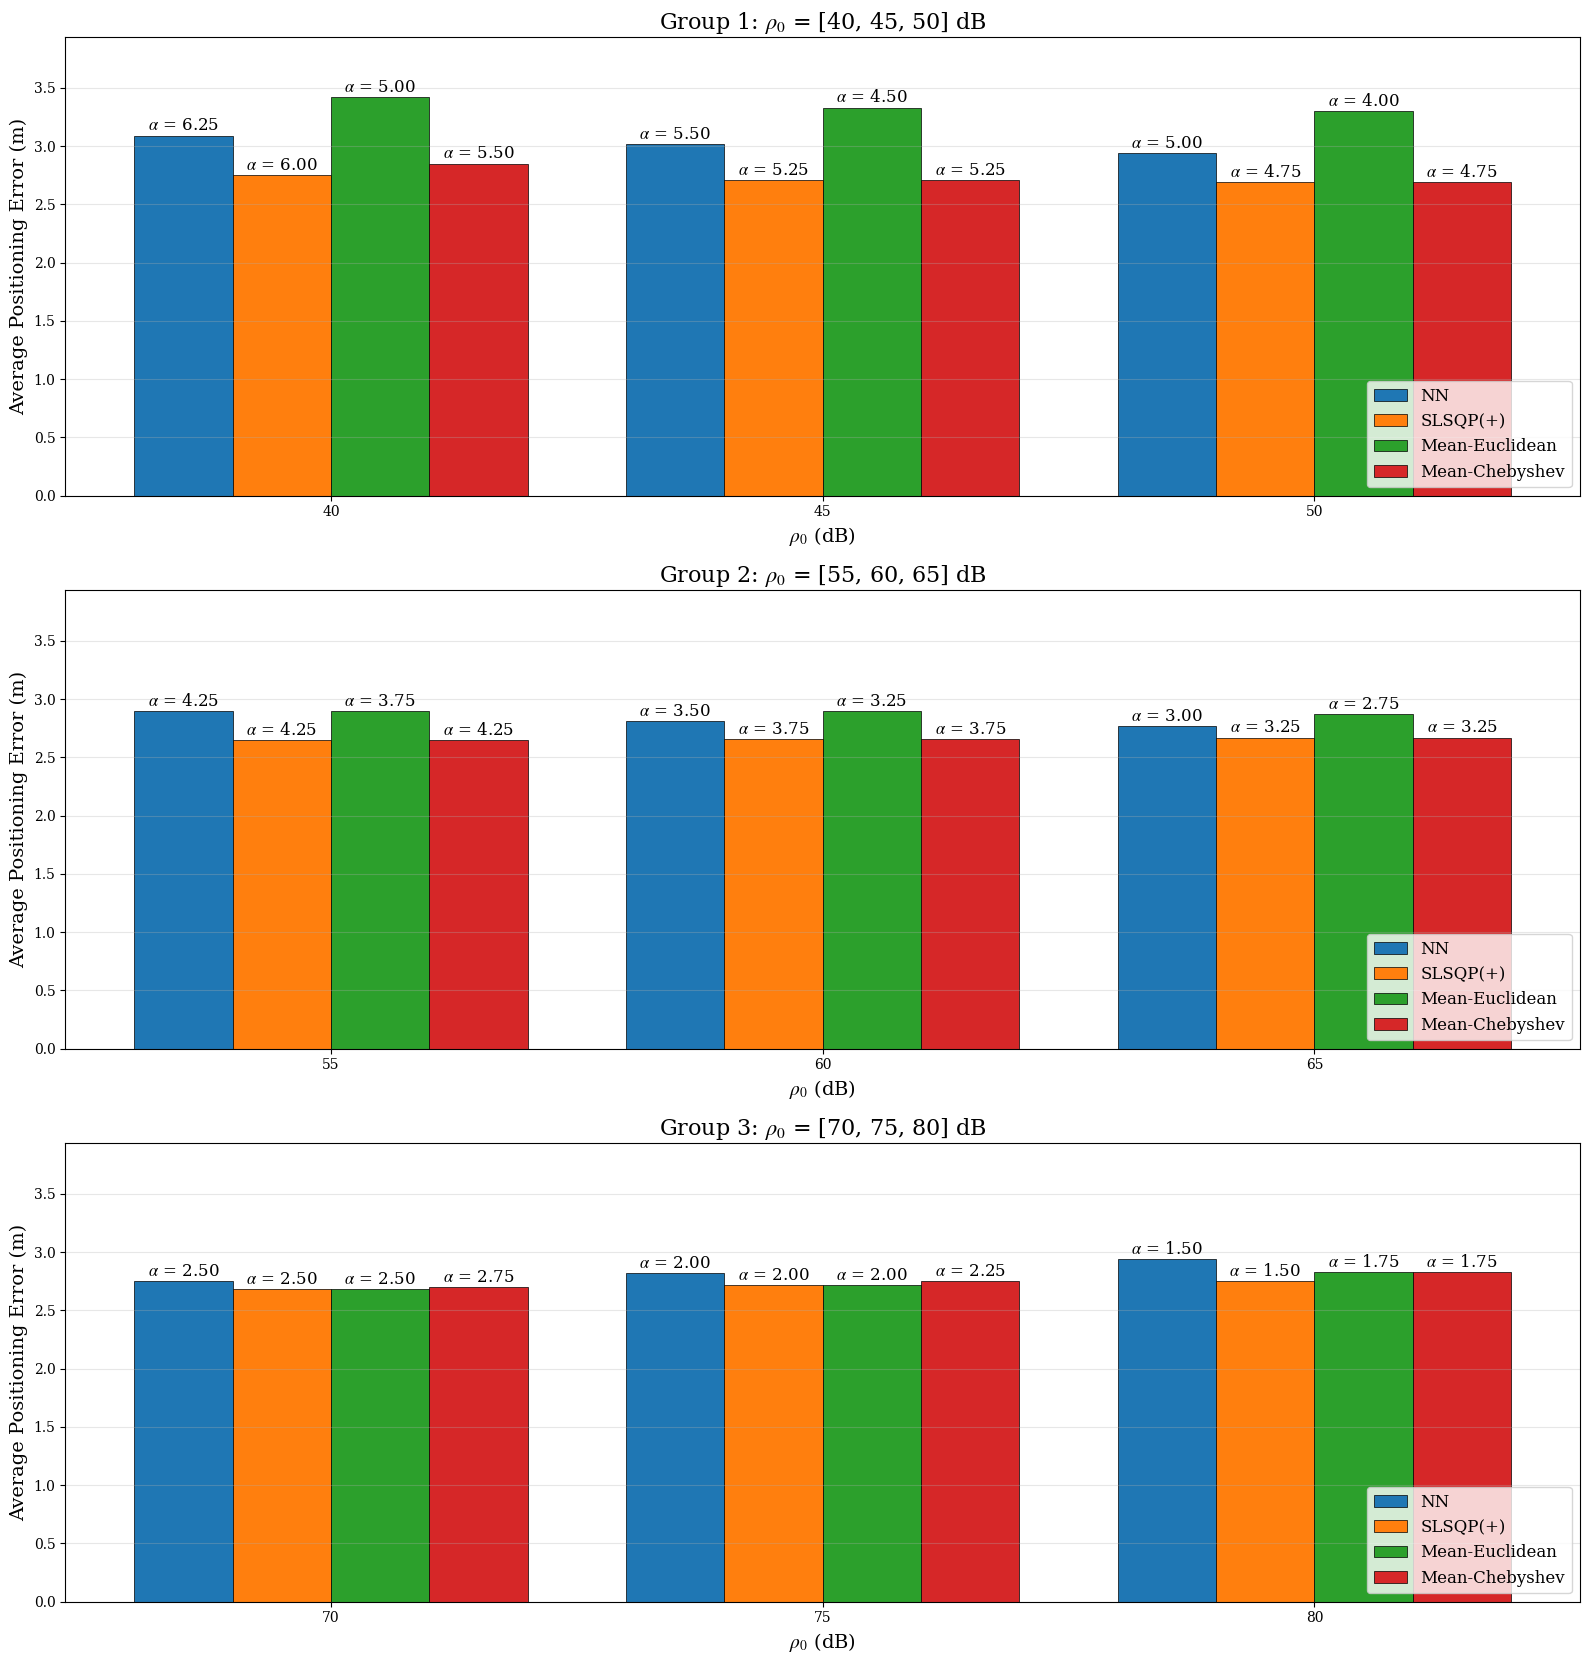


=== OPTIMAL PARAMETERS SUMMARY ===

NN:
  Best performance: 2.750m
  Worst performance: 3.090m
  Average performance: 2.893m
  Alpha range: 1.50 - 6.25
  Best at: ρ₀=70.0, α=2.5

SLSQP(+):
  Best performance: 2.650m
  Worst performance: 2.750m
  Average performance: 2.698m
  Alpha range: 1.50 - 6.00
  Best at: ρ₀=55.0, α=4.25

Mean-Euclidean:
  Best performance: 2.680m
  Worst performance: 3.420m
  Average performance: 2.994m
  Alpha range: 1.75 - 5.00
  Best at: ρ₀=70.0, α=2.5

Mean-Chebyshev:
  Best performance: 2.650m
  Worst performance: 2.850m
  Average performance: 2.723m
  Alpha range: 1.75 - 5.50
  Best at: ρ₀=55.0, α=4.25

=== PERFORMANCE COMPARISON BY RHO_0 ===

ρ₀ = 40 dB:
  Ranking (best to worst):
    1. SLSQP(+): 2.750m (α=6.00)
    2. Mean-Chebyshev: 2.850m (α=5.50)
    3. NN: 3.090m (α=6.25)
    4. Mean-Euclidean: 3.420m (α=5.00)

ρ₀ = 45 dB:
  Ranking (best to worst):
    1. Mean-Chebyshev: 2.710m (α=5.25)
    2. SLSQP(+): 2.710m (α=5.25)
    3. NN: 3.020m (α=5.50)
  

In [17]:
# Load optimal parameters data
optimal_file = project_root / 'output' / 'optimal_parameters_by_algorithm.csv'
optimal_data = pd.read_csv(optimal_file)

print("Optimal parameters data loaded:")
print(f"Shape: {optimal_data.shape}")
print(f"Algorithms: {optimal_data['algorithm'].unique().tolist()}")
print(f"rho_0 range: {optimal_data['rho_0'].min()} - {optimal_data['rho_0'].max()}")

# Filter data for selected rho_0 values (40 to 80 with steps of 5)
optimal_filtered = optimal_data[optimal_data['rho_0'].isin(selected_rho_values)]

# Split into three groups for three plots (3 rho_0 values each)
rho_groups = [
    [40, 45, 50],  # Group 1
    [55, 60, 65],  # Group 2
    [70, 75, 80]   # Group 3
]

# Create the 3x1 subplot for bar plots
fig3, axes3 = plt.subplots(3, 1, figsize=(16, 18))
# fig3.suptitle('Optimal Algorithm Performance by Log-Distance Path Loss Parameters\n' +
#               r'Mean Error and Optimal $\alpha$ Values',
#               fontsize=18, fontweight='bold')

# Define colors for each algorithm
algorithm_colors = {
    'NN': '#1f77b4',
    'SLSQP(+)': '#ff7f0e',
    'Mean-Euclidean': '#2ca02c',
    'Mean-Chebyshev': '#d62728'
}

# Create bar plots for each group
for plot_idx, rho_group in enumerate(rho_groups):
    ax = axes3[plot_idx]

    # Filter data for current rho_0 group
    group_data = optimal_filtered[optimal_filtered['rho_0'].isin(rho_group)]

    # Prepare data for plotting
    rho_positions = np.arange(len(rho_group))
    bar_width = 0.2
    algorithms = ['NN', 'SLSQP(+)', 'Mean-Euclidean', 'Mean-Chebyshev']

    # Plot bars for each algorithm
    for alg_idx, algorithm in enumerate(algorithms):
        alg_data = group_data[group_data['algorithm'] == algorithm].sort_values('rho_0')

        # Get mean_error and alpha values for current algorithm and rho_0 group
        mean_errors = []
        alpha_values = []

        for rho_0 in rho_group:
            rho_alg_data = alg_data[alg_data['rho_0'] == rho_0]
            if not rho_alg_data.empty:
                mean_errors.append(rho_alg_data['mean_error'].iloc[0])
                alpha_values.append(rho_alg_data['alpha'].iloc[0])
            else:
                mean_errors.append(0)
                alpha_values.append(0)

        # Calculate bar positions
        positions = rho_positions + alg_idx * bar_width

        # Create bars
        bars = ax.bar(positions, mean_errors, bar_width,
                     label=algorithm,
                     color=algorithm_colors[algorithm],
                     alpha=1.0,
                     edgecolor='black',
                     linewidth=0.5)

        # Add alpha values above bars
        for bar, alpha_val in zip(bars, alpha_values):
            if alpha_val > 0:  # Only add text if we have valid data
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'$\\alpha$ = {alpha_val:.2f}',
                       ha='center', va='bottom', fontsize=12)

    # Customize subplot
    ax.set_xlabel(r'$\rho_0$ (dB)', fontsize=14)
    ax.set_ylabel('Average Positioning Error (m)', fontsize=14)
    ax.set_title(f'Group {plot_idx + 1}: $\\rho_0$ = {rho_group} dB', fontsize=16)
    ax.set_xticks(rho_positions + bar_width * 1.5)
    ax.set_xticklabels([f'{rho}' for rho in rho_group])
    ax.legend(fontsize=12, loc='lower right')
    ax.grid(True, alpha=0.3, axis='y')

    # Set consistent y-axis limits for better comparison
    ax.set_ylim(0, optimal_filtered['mean_error'].max() * 1.15)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# Print summary statistics
print("\n=== OPTIMAL PARAMETERS SUMMARY ===")
for algorithm in algorithms:
    alg_data = optimal_filtered[optimal_filtered['algorithm'] == algorithm]
    print(f"\n{algorithm}:")
    print(f"  Best performance: {alg_data['mean_error'].min():.3f}m")
    print(f"  Worst performance: {alg_data['mean_error'].max():.3f}m")
    print(f"  Average performance: {alg_data['mean_error'].mean():.3f}m")
    print(f"  Alpha range: {alg_data['alpha'].min():.2f} - {alg_data['alpha'].max():.2f}")

    # Best performance details
    best_idx = alg_data['mean_error'].idxmin()
    print(f"  Best at: ρ₀={alg_data.loc[best_idx, 'rho_0']}, α={alg_data.loc[best_idx, 'alpha']}")

# Cross-algorithm comparison at each rho_0
print("\n=== PERFORMANCE COMPARISON BY RHO_0 ===")
for rho_0 in selected_rho_values:
    rho_data = optimal_filtered[optimal_filtered['rho_0'] == rho_0].sort_values('mean_error')
    print(f"\nρ₀ = {rho_0} dB:")
    print("  Ranking (best to worst):")
    for rank, (_, row) in enumerate(rho_data.iterrows(), 1):
        print(f"    {rank}. {row['algorithm']}: {row['mean_error']:.3f}m (α={row['alpha']:.2f})")

# # Save the figure
# fig3.savefig(project_root / 'figures' / 'optimal_parameters_barplot.pdf', bbox_inches='tight')
# print(f"\nBar plot figure saved as 'optimal_parameters_barplot.pdf' in the figures directory.")

In [18]:
# Save the figure
fig3.savefig(project_root / 'figures' / 'optimal_parameters_barplot.pdf', bbox_inches='tight')
print("\nBar plot figure saved as 'optimal_parameters_barplot.pdf' in the figures directory.")


Bar plot figure saved as 'optimal_parameters_barplot.pdf' in the figures directory.


### 4. Cumulative error distribution - $\rho_0$ $\in$ {50, 55, 60, 65}

Data loaded successfully:
Optimal parameters shape: (68, 4)
Grouped device results shape: (782, 7)

Processing ρ₀ = 50 dB...
  NN: 1420 error samples, α=5.00
  SLSQP(+): 1420 error samples, α=4.75
  Mean-Euclidean: 1420 error samples, α=4.00
  Mean-Chebyshev: 1420 error samples, α=4.75

Processing ρ₀ = 52.5 dB...
  NN: 1420 error samples, α=4.50
  SLSQP(+): 1420 error samples, α=4.50
  Mean-Euclidean: 1420 error samples, α=4.00
  Mean-Chebyshev: 1420 error samples, α=4.50

Processing ρ₀ = 55 dB...
  NN: 1420 error samples, α=4.25
  SLSQP(+): 1420 error samples, α=4.25
  Mean-Euclidean: 1420 error samples, α=3.75
  Mean-Chebyshev: 1420 error samples, α=4.25

Processing ρ₀ = 57.5 dB...
  NN: 1420 error samples, α=3.75
  SLSQP(+): 1420 error samples, α=4.00
  Mean-Euclidean: 1420 error samples, α=3.50
  Mean-Chebyshev: 1420 error samples, α=4.00

Processing ρ₀ = 60 dB...
  NN: 1420 error samples, α=3.50
  SLSQP(+): 1420 error samples, α=3.75
  Mean-Euclidean: 1420 error samples, α=3.25
  

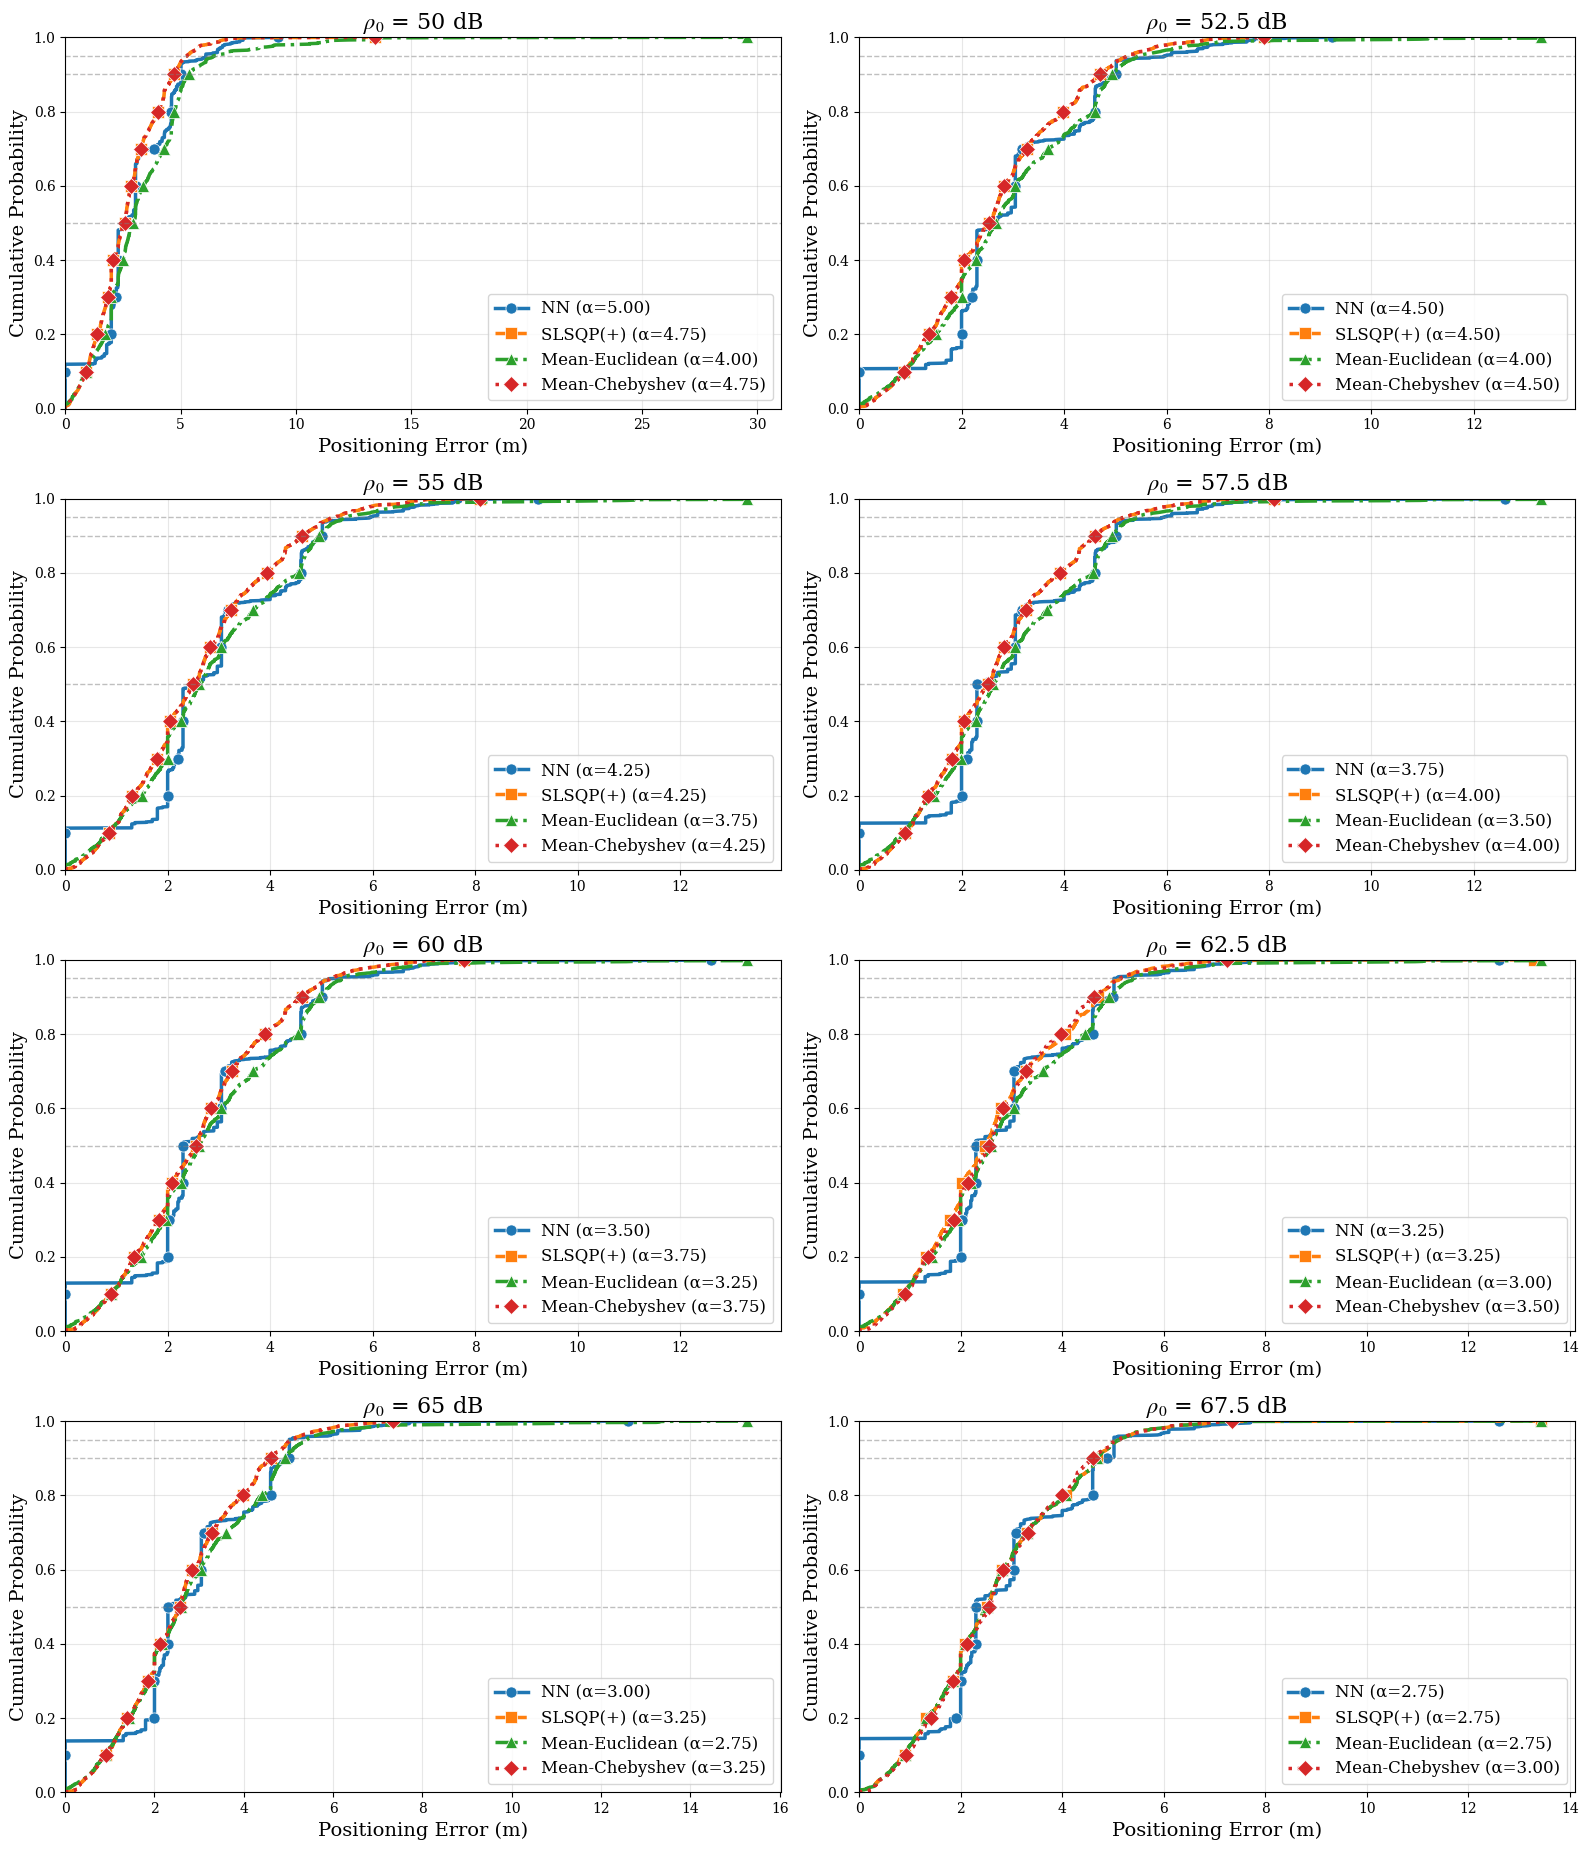


=== CUMULATIVE DISTRIBUTION SUMMARY ===

ρ₀ = 50 dB:
  Mean-Chebyshev (α=4.75):
    Samples: 1420
    Mean: 2.691m
    Median (50th percentile): 2.580m
    90th percentile: 4.711m
    95th percentile: 5.280m
    Max error: 13.430m
  Mean-Euclidean (α=4.00):
    Samples: 1420
    Mean: 3.307m
    Median (50th percentile): 2.945m
    90th percentile: 5.381m
    95th percentile: 6.434m
    Max error: 29.560m
  NN (α=5.00):
    Samples: 1420
    Mean: 2.945m
    Median (50th percentile): 2.690m
    90th percentile: 5.020m
    95th percentile: 6.100m
    Max error: 9.230m
  SLSQP(+) (α=4.75):
    Samples: 1420
    Mean: 2.691m
    Median (50th percentile): 2.580m
    90th percentile: 4.711m
    95th percentile: 5.280m
    Max error: 13.430m

ρ₀ = 52.5 dB:
  Mean-Chebyshev (α=4.50):
    Samples: 1420
    Mean: 2.665m
    Median (50th percentile): 2.545m
    90th percentile: 4.710m
    95th percentile: 5.231m
    Max error: 7.910m
  Mean-Euclidean (α=4.00):
    Samples: 1420
    Mean: 2.918m

In [19]:
# Load the required data files
optimal_file = project_root / 'output' / 'optimal_parameters_by_algorithm.csv'
grouped_file = project_root / 'output' / 'grouped_device_results.csv'

optimal_data = pd.read_csv(optimal_file)
grouped_data = pd.read_csv(grouped_file)

print("Data loaded successfully:")
print(f"Optimal parameters shape: {optimal_data.shape}")
print(f"Grouped device results shape: {grouped_data.shape}")

# Function to safely parse error list strings
def parse_error_list(error_str):
    """Convert string representation of list back to actual list of floats"""
    try:
        # Remove brackets and extra spaces, then split
        clean_str = error_str.strip('[]').replace(' ', '')
        if clean_str:
            return [float(x) for x in clean_str.split(',') if x.strip()]
        else:
            return []
    except (ValueError, TypeError, AttributeError) as e:
        # Log the error if needed
        # print(f"Error parsing error list: {e}")
        return []

# Parse error lists in grouped data
grouped_data['error_list'] = grouped_data['error_list_str'].apply(parse_error_list)

# Define the rho_0 values to analyze
target_rho_values = [50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5]

# Algorithm mapping: optimal_file algorithm -> grouped_file algorithm
algorithm_mapping = {
    'NN': 'NN',
    'SLSQP(+)': 'SLSQP(+)',
    'Mean-Euclidean': 'SLSQP(+)',
    'Mean-Chebyshev': 'SLSQP(+)'
}

# Colors for each algorithm
algorithm_colors = {
    'NN': '#1f77b4',
    'SLSQP(+)': '#ff7f0e',
    'Mean-Euclidean': '#2ca02c',
    'Mean-Chebyshev': '#d62728'
}

# Line styles and markers for each algorithm
algorithm_styles = {
    'NN': {'linestyle': '-', 'marker': 'o', 'markersize': 8},
    'SLSQP(+)': {'linestyle': '--', 'marker': 's', 'markersize': 8},
    'Mean-Euclidean': {'linestyle': '-.', 'marker': '^', 'markersize': 8},
    'Mean-Chebyshev': {'linestyle': ':', 'marker': 'D', 'markersize': 8}
}

# Create 4x2 subplot for the 8 rho_0 values
fig4, axes4 = plt.subplots(4, 2, figsize=(16, 20))
# fig4.suptitle('Cumulative Error Distribution by Algorithm\n' +
#               r'Optimal Parameters for Selected $\rho_0$ Values',
#               fontsize=18, fontweight='bold')

# Flatten axes for easier iteration
axes_flat = axes4.flatten()

# Process each rho_0 value
for idx, rho_0 in enumerate(target_rho_values):
    ax = axes_flat[idx]

    print(f"\nProcessing ρ₀ = {rho_0} dB...")

    # Get optimal parameters for each algorithm at this rho_0
    rho_optimal = optimal_data[optimal_data['rho_0'] == rho_0]

    # Define algorithm order for consistent plotting
    algorithm_order = ['NN', 'SLSQP(+)', 'Mean-Euclidean', 'Mean-Chebyshev']

    # Plot CDF for each algorithm in the specified order
    for algorithm in algorithm_order:
        opt_row = rho_optimal[rho_optimal['algorithm'] == algorithm]
        if opt_row.empty:
            continue
        opt_row = opt_row.iloc[0]  # Get the first (and should be only) row
        alpha = opt_row['alpha']

        # Map to grouped data algorithm
        grouped_algorithm = algorithm_mapping[algorithm]

        # Find corresponding error data
        error_data = grouped_data[
            (grouped_data['algorithm'] == grouped_algorithm) &
            (grouped_data['rho_0'] == rho_0) &
            (grouped_data['alpha'] == alpha)
        ]

        if not error_data.empty:
            # Get error list
            errors = error_data['error_list'].iloc[0]

            if errors and len(errors) > 0:
                # Sort errors for CDF
                sorted_errors = np.sort(errors)

                # Calculate cumulative probabilities
                n = len(sorted_errors)
                cumulative_probs = np.arange(1, n + 1) / n

                # Create marker positions at every 0.1 probability (10%, 20%, ..., 100%)
                marker_probs = np.arange(0.1, 1.1, 0.1)  # [0.1, 0.2, 0.3, ..., 1.0]
                marker_indices = []

                for prob in marker_probs:
                    # Find the index closest to this probability
                    idx = np.argmin(np.abs(cumulative_probs - prob))
                    marker_indices.append(idx)

                # Plot CDF
                line_alpha = 1.0 if algorithm == 'SLSQP(+)' else 1.0
                ax.plot(sorted_errors, cumulative_probs,
                       label=f'{algorithm} (α={alpha:.2f})',
                       color=algorithm_colors[algorithm],
                       linewidth=2.5,
                       alpha=line_alpha,
                       linestyle=algorithm_styles[algorithm]['linestyle'],
                       marker=algorithm_styles[algorithm]['marker'],
                       markersize=algorithm_styles[algorithm]['markersize'],
                       markevery=marker_indices,
                       markerfacecolor=algorithm_colors[algorithm],
                       markeredgecolor='white',
                       markeredgewidth=0.5)

                print(f"  {algorithm}: {len(errors)} error samples, α={alpha:.2f}")
            else:
                print(f"  {algorithm}: No error data found")
        else:
            print(f"  {algorithm}: No matching data for α={alpha:.2f}")

    # Customize subplot
    ax.set_xlabel('Positioning Error (m)', fontsize=14)
    ax.set_ylabel('Cumulative Probability', fontsize=14)
    ax.set_title(f'$\\rho_0$ = {rho_0} dB', fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12, loc='lower right')
    ax.set_xlim(left=0)
    ax.set_ylim(0, 1)

    # Add percentile lines for reference
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    ax.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    ax.axhline(y=0.95, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# Print summary statistics for each rho_0 and algorithm
print("\n=== CUMULATIVE DISTRIBUTION SUMMARY ===")
for rho_0 in target_rho_values:
    print(f"\nρ₀ = {rho_0} dB:")
    rho_optimal = optimal_data[optimal_data['rho_0'] == rho_0]

    for _, opt_row in rho_optimal.iterrows():
        algorithm = opt_row['algorithm']
        alpha = opt_row['alpha']
        grouped_algorithm = algorithm_mapping[algorithm]

        # Find error data
        error_data = grouped_data[
            (grouped_data['algorithm'] == grouped_algorithm) &
            (grouped_data['rho_0'] == rho_0) &
            (grouped_data['alpha'] == alpha)
        ]

        if not error_data.empty:
            errors = error_data['error_list'].iloc[0]
            if errors and len(errors) > 0:
                errors_array = np.array(errors)
                print(f"  {algorithm} (α={alpha:.2f}):")
                print(f"    Samples: {len(errors)}")
                print(f"    Mean: {errors_array.mean():.3f}m")
                print(f"    Median (50th percentile): {np.percentile(errors_array, 50):.3f}m")
                print(f"    90th percentile: {np.percentile(errors_array, 90):.3f}m")
                print(f"    95th percentile: {np.percentile(errors_array, 95):.3f}m")
                print(f"    Max error: {errors_array.max():.3f}m")

# Save the figure
fig4.savefig(project_root / 'figures' / 'cumulative_error_distribution.pdf', bbox_inches='tight')
print("\nCumulative distribution figure saved as 'cumulative_error_distribution.pdf' in the figures directory.")